### Module 3: Locality-Sensitive Hashing

Here is a matrix representing the signatures of seven columns, C1 through C7.

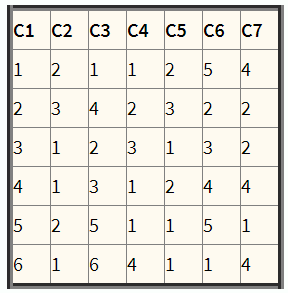

In [1]:
from IPython.display import Image
Image(filename='matrix1.png')

Suppose we use locality-sensitive hashing with three bands of two rows each. Assume there are enough buckets available that the hash function for each band can be the identity function (i.e., columns hash to the same bucket if and only if they are identical in the band). Find all the candidate pairs.

In [2]:
import numpy as np

matrix = np.array([[1, 2, 1, 1, 2, 5, 4],
                   [2, 3, 4, 2, 3, 2, 2],
                   [3, 1, 2, 3, 1, 3, 2],
                   [4, 1, 3, 1, 2, 4, 4],
                   [5, 2, 5, 1, 1, 5, 1],
                   [6, 1, 6, 4, 1, 1, 4]])

num_rows, num_cols = matrix.shape
bands = np.split(matrix, 3)

candidate_pairs = []

for band in bands:
    signature_fragments = np.split(band, num_cols, axis=1)
    for i in range(0, num_cols):
        for j in range(i+1, num_cols):
            fragment1 = signature_fragments[i]
            fragment2 = signature_fragments[j]
            if np.array_equal(fragment1, fragment2):
                candidate_pairs.append('C{} & C{}'.format(i+1, j+1))

print(candidate_pairs)

['C1 & C4', 'C2 & C5', 'C1 & C6', 'C1 & C3', 'C4 & C7']


Suppose we have computed signatures for a number of columns, and each signature consists of 24 integers, arranged as a column of 24 rows. There are N pairs of signatures that are 50% similar (i.e., they agree in half of the rows). There are M pairs that are 20% similar, and all other pairs (an unknown number) are 0% similar.

We can try to find 50%-similar pairs by using Locality-Sensitive Hashing (LSH), and we can do so by choosing bands of 1, 2, 3, 4, 6, 8, 12, or 24 rows. Calculate approximately, in terms of N and M, the number of false positives and the number of false negatives, for each choice for the number of rows. Then, suppose that we assign equal cost to false positives and false negatives (an atypical assumption). Which number of rows would you choose if M:N were in each of the following ratios: 1:1, 10:1, 100:1, and 1000:1?

In [11]:
signature_length = 24
band_sizes = [1, 2, 3, 4, 6, 8, 12, 24]
ratios = [(1, 1), (10, 1), (100, 1), (1000, 1)]

for M, N in ratios:
    for num_rows in band_sizes:
        num_bands = signature_length / num_rows
        # 50% similar pairs don't match in any band
        p_fn = (1 - 0.5 ** num_rows) ** num_bands
        # 20% similar pairs match in at least 1 band
        p_fp = 1 - (1 - 0.2 ** num_rows) ** num_bands
        cost = p_fn + p_fp
        print('ratio: {}:{}, rows: {}, cost: {}'.format(M, N, num_rows, cost))

ratio: 1:1, rows: 1, cost: 0.9952776931217752
ratio: 1:1, rows: 2, cost: 0.4189665946943113
ratio: 1:1, rows: 3, cost: 0.4058453029135014
ratio: 1:1, rows: 4, cost: 0.688495838716443
ratio: 1:1, rows: 6, cost: 0.9392056199906307
ratio: 1:1, rows: 8, cost: 0.9883346467428819
ratio: 1:1, rows: 12, cost: 0.9995117865466447
ratio: 1:1, rows: 24, cost: 0.9999999403953552
ratio: 10:1, rows: 1, cost: 0.9952776931217752
ratio: 10:1, rows: 2, cost: 0.4189665946943113
ratio: 10:1, rows: 3, cost: 0.4058453029135014
ratio: 10:1, rows: 4, cost: 0.688495838716443
ratio: 10:1, rows: 6, cost: 0.9392056199906307
ratio: 10:1, rows: 8, cost: 0.9883346467428819
ratio: 10:1, rows: 12, cost: 0.9995117865466447
ratio: 10:1, rows: 24, cost: 0.9999999403953552
ratio: 100:1, rows: 1, cost: 0.9952776931217752
ratio: 100:1, rows: 2, cost: 0.4189665946943113
ratio: 100:1, rows: 3, cost: 0.4058453029135014
ratio: 100:1, rows: 4, cost: 0.688495838716443
ratio: 100:1, rows: 6, cost: 0.9392056199906307
ratio: 100:1, r

Find the set of 2-shingles for the "document" ABRACADABRA and also for the "document" BRICABRAC.

In [4]:
def shingles(document, size):
    return {
        document[i:i+size]
        for i in range(len(document))
        if i+size <= len(document)
    }

shingles1 = shingles('ABRACADABRA', 2)
shingles2 = shingles('BRICABRAC', 2)
common_shingles = shingles1.intersection(shingles2)
total_shingles = shingles1.union(shingles2)
jaccard = len(common_shingles) / len(total_shingles)

print('No. of 2-shingles in ABRACADABRA: {}'.format(len(shingles1)))
print('No. of 2-shingles in BRICABRAC: {}'.format(len(shingles2)))
print('Jaccard similarity: {}/{}'.format(len(common_shingles), len(total_shingles)))

No. of 2-shingles in ABRACADABRA: 7
No. of 2-shingles in BRICABRAC: 7
Jaccard similarity: 5/9


Consider the following matrix:

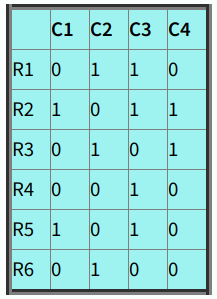

In [5]:
Image(filename='matrix2.png')

Compute the Jaccard similarity between each pair of columns. Which of the following is the true similarity of the two stated columns?

In [6]:
matrix = np.array([[0, 1, 1, 0],
                   [1, 0, 1, 1],
                   [0, 1, 0, 1],
                   [0, 0, 1, 0],
                   [1, 0, 1, 0],
                   [0, 1, 0, 0]])

num_rows, num_cols = matrix.shape
cols = np.split(matrix, num_cols, axis=1)

for i in range(0, len(cols)):
    for j in range(i+1, len(cols)):
        num_same = sum([
            1 for k in range(0, num_rows)
            if cols[i][k] == cols[j][k] == 1
        ])
        num_compare = sum([
            1 for k in range(0, num_rows)
            if cols[i][k] != cols[j][k]
            or cols[i][k] == cols[j][k] == 1
        ])
        print('C{} & C{}: {}/{}'.format(i+1, j+1, num_same, num_compare))

C1 & C2: 0/5
C1 & C3: 2/4
C1 & C4: 1/3
C2 & C3: 1/6
C2 & C4: 1/4
C3 & C4: 1/5


Consider the following matrix:

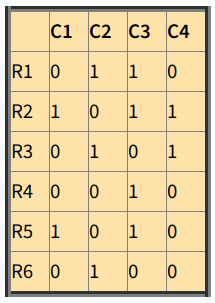

In [7]:
Image(filename='matrix3.png')

Perform a minhashing of the data, with the order of rows: R4, R6, R1, R3, R5, R2.

Note: we give the minhash value in terms of the original name of the row, rather than the order of the row in the permutation. These two schemes are equivalent, since we only care whether hash values for two columns are equal, not what their actual values are.

In [8]:
matrix = np.array([[0, 1, 1, 0],
                   [1, 0, 1, 1],
                   [0, 1, 0, 1],
                   [0, 0, 1, 0],
                   [1, 0, 1, 0],
                   [0, 1, 0, 0]])

order = [4, 6, 1, 3, 5, 2]

num_rows, num_cols = matrix.shape
minhash = [0] * num_cols

for i, o in enumerate(order):
    row = matrix[o - 1]
    for c in range(num_cols):
        if row[c] == 1:
            if minhash[c] == 0:
                minhash[c] = o
            elif i < order.index(minhash[c]):
                minhash[c] = o

print(minhash)

[5, 6, 4, 3]
